# Solving first order ODE

In this notebook we will solve a first order ode. We will assume the following trial solution:
<p style="text-align: center;">Y(x) = A + (x - a)*N(x, w)</p>
For solving the initial value problem Y(a) = A, we will consider a = 0.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import ScalarFormatter

COMP = "Output comparison"
LOSS = "Cost curve"

## Define a class for solving the ode

All equations are present in the paper

In [2]:
# python class for solving ode, all equations presented will be linked to equations presented on paper

class FirstODE():
    import numpy as np
    import matplotlib.pyplot as plt
    

    # passed functions must accept numpy arrays as inputs
    def __init__(self, w, b, v, func, func_der, A):
        
        # first set of weights
        self.w = self.np.reshape(self.np.array(w), (-1, 1)) 
        # biases
        self.b = self.np.reshape(self.np.array(b), (-1, 1)) 
        # second set of weights
        self.v = self.np.reshape(self.np.array(v), (-1, 1))
        
        # function from cost function f(x, y)
        self.func = func
        # derivative of function from cost function df(x, y)/dy
        self.func_der = func_der 
        # value of intercept
        self.A = A
    
    
    
    #### calculations ####
    """calc the output of certain array of inputs of nn of certain order --> equation 3 + equation 9"""
    def compute(self, inp, order):
        hid_layer = self.np.add(self.np.dot(inp, self.np.transpose(self.w)), self.np.transpose(self.b))
        act_func = self.sigmoid(hid_layer, order)
        return self.np.dot(act_func, (self.v * self.w**order))
    

    """calc the cost of a certain set of points --> equation 4"""
    def cost(self, inp):
        y = self.A + inp * self.compute(inp, 0)
        return self.np.mean((self.compute(inp, 0) + inp * self.compute(inp, 1) - self.func(inp, y))**2)


    
    #### optimization ####
    """update nn weights using sigmoid --> equation 5"""
    def update_weights(self, inp, l_rate):
      
        sp_cost = self.simple_cost(inp)
        
        new_b = self.np.zeros(self.b.shape)
        new_v = self.np.zeros(self.v.shape)
        new_w = self.np.zeros(self.w.shape)

        #update weight
        for i in range(len(self.w)): # number of neurons in hidden layer
            
            # update bias ## --> equation 8
            new_b[i] = self.b[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_b(inp, self.w[i], self.b[i], self.v[i])))
            
            # update v ## --> equation 8
            new_v[i] = self.v[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_v(inp, self.w[i], self.b[i])))
            
            # update w ## --> equation 8
            new_w[i] = self.w[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_w(inp, self.w[i], self.b[i], self.v[i])))

        self.b = new_b
        self.v = new_v
        self.w = new_w

    """simple cost is a constant value used in cost function and derivative"""
    def simple_cost(self, inp):
        y = self.A + inp * self.compute(inp, 0)
        return self.compute(inp, 0) + inp * self.compute(inp, 1) - self.func(inp, y)

    
    ## beta ##
    """derivative of N in respect to beta --> equation 11"""
    def derive_b(self, inp, w, b, v, order):
        return v * w**order * self.sigmoid(w*inp+b, order+1)
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_b(self, inp, w, b, v):
        y = self.A + inp * self.compute(inp, 0)
        return self.derive_b(inp,w,b,v,0) + inp * self.derive_b(inp,w,b,v,1) - self.func_der(inp,y)*inp*self.derive_b(inp,w,b,v,0)
    
    ## v ##
    """derivative of N in respect to v --> equation 12"""
    def derive_v(self, x, w, b, order):
        return w**order * self.sigmoid(x*w+b, order)
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_v(self, inp, w, b):
        y = self.A + inp * self.compute(inp, 0)
        return self.derive_v(inp,w,b,0) + inp * self.derive_v(inp,w,b,1) - self.func_der(inp, y)*inp*self.derive_v(inp,w,b,0)
    
    
    ## w ##
    """derivative of N in respect to w --> equation 10"""
    def derive_w(self, x, w, b, v, order):
        z=w*x+b
        if order == 0:
            return v*x*self.sigmoid(w*x+b, order)
        else:
            return v*(order*(w**(order-1))*self.sigmoid(z, order) + x*(w**order)*self.sigmoid(z, order+1))
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_w(self, inp, w, b, v):
        y = self.A + inp * self.compute(inp, 0)
        return self.derive_w(inp,w,b,v,0) + inp * self.derive_w(inp,w,b,v,1) - self.func_der(inp, y)*inp*self.derive_w(inp,w,b,v,0)
    



    ### desired output ###
    """get trial solution value --> equation 6"""
    def get_real_values(self, inp):
        return self.A + inp * self.compute(inp, 0)
    


    ##### sigmoid and derivatives #####
    def sig(self, x): 
        return 1/(1 + self.np.exp(-x))

    def sig_first(self, x): # first derivative of sigmoid
        return self.sig(x)*(1 - self.sig(x))

    def sig_second(self, x): # second derivative of sigmoid
        return self.sig(x)*(1 - self.sig(x))*(1 - 2*self.sig(x))

    def sigmoid(self, x, order):
        if order == 0:
            return self.sig(x)
        elif order == 1:
            return self.sig_first(x)
        elif order == 2:
            return self.sig_second(x)        
     
    

    
    
    

class SecondODE():
    import numpy as np
    import matplotlib.pyplot as plt
    

    # passed functions must accept numpy arrays as inputs
    def __init__(self, w, b, v, func, func_der, a, A, c, C):
        
        # first set of weights
        self.w = self.np.reshape(self.np.array(w), (-1, 1)) 
        # biases
        self.b = self.np.reshape(self.np.array(b), (-1, 1)) 
        # second set of weights
        self.v = self.np.reshape(self.np.array(v), (-1, 1))
        
        # function from cost function f(x, y, dy)
        self.func = func
        
        # derivative of function from cost function df(x, y)/dy
        self.func_der = func_der 
        
        # values for boundry definition
        self.a = a
        self.A = A
        self.c = c
        self.C = C
        
    
    
    
    #### calculations ####
    """calc the output of certain array of inputs of nn of certain order --> equation 3 + equation 9"""
    def compute(self, inp, order):
        hid_layer = self.np.add(self.np.dot(inp, self.np.transpose(self.w)), self.np.transpose(self.b))
        act_func = self.sigmoid(hid_layer, order)
        return self.np.dot(act_func, (self.v * self.w**order))
    

    """calc the cost of a certain set of points --> equation 4"""
    def cost(self, inp):
        y = self.get_y_trial(inp, 0)
        dy = self.get_y_trial(inp, 1)
        ddy = self.get_y_trial(inp, 2)
        
        return self.np.mean((ddy - self.func(inp, y, dy))**2)
    
    
    def get_y_trial_zero(self, inp):
        Al = self.A/(self.c - self.a)
        Cl = self.C/(self.c - self.a)
        
        return Al*(self.c - inp) + Cl*(inp - self.a) + (self.c - inp)*(inp - self.a)*self.compute(inp, 0)
    
    def get_y_trial_first(self, inp):
        Al = self.A/(self.c - self.a)
        Cl = self.C/(self.c - self.a)
        eq_1 = (-2*inp + (self.c+self.a))*self.compute(inp, 0)
        eq_2 = (-(inp**2) +(self.c+self.a)*inp - self.c*self.a)*self.compute(inp, 1)
        
        return -Al + Cl + eq_1 + eq_2
    
    def get_y_trial_second(self, inp):
        eq_1 = (-(inp**2) +(self.c+self.a)*inp - self.c*self.a)*self.compute(inp, 2)
        
        return -2*self.compute(inp, 0) + 2*(-2*inp + (self.c+self.a))*self.compute(inp, 1) + eq_1
    
    def get_y_trial(self, inp, order):
        if order == 0:
            return self.get_y_trial_zero(inp)
        elif order == 1:
            return self.get_y_trial_first(inp)
        elif order == 2:
            return self.get_y_trial_second(inp)
    
    
    
    
    #### optimization ####
    """update nn weights using sigmoid --> equation 5"""
    def update_weights(self, inp, l_rate):
      
        sp_cost = self.simple_cost(inp)
        
        new_b = self.np.zeros(self.b.shape)
        new_v = self.np.zeros(self.v.shape)
        new_w = self.np.zeros(self.w.shape)

        #update weight
        for i in range(len(self.w)): # number of neurons in hidden layer
            
            # update bias ## --> equation 8
            new_b[i] = self.b[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_b(inp, self.w[i], self.b[i], self.v[i])))
            
            # update v ## --> equation 8
            new_v[i] = self.v[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_v(inp, self.w[i], self.b[i])))
            
            # update w ## --> equation 8
            new_w[i] = self.w[i] - l_rate*(2*np.mean(sp_cost * self.cost_derive_w(inp, self.w[i], self.b[i], self.v[i])))

        self.b = new_b
        self.v = new_v
        self.w = new_w

    """simple cost is a constant value used in cost function and derivative"""
    def simple_cost(self, inp):
        y = self.get_y_trial(inp, 0)
        dy = self.get_y_trial(inp, 1)
        ddy = self.get_y_trial(inp, 2)
        
        return ddy - self.func(inp, y, dy)

    
    ## beta ##
    """derivative of N in respect to beta --> equation 11"""
    def derive_b(self, inp, w, b, v, order):
        return v * w**order * self.sigmoid(w*inp+b, order+1)
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_b(self, inp, w, b, v):
        eq_1 = -2*self.derive_b(inp,w,b,v,0) + 2*(-2*inp + (b+a))*self.derive_b(inp,w,b,v, 1)
        
        return eq_1 + (-(inp**2) + (b+a)*inp + b*a)*self.derive_b(inp,w,b,v,2)
    
    ## v ##
    """derivative of N in respect to v --> equation 12"""
    def derive_v(self, x, w, b, order):
        return w**order * self.sigmoid(x*w+b, order)
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_v(self, inp, w, b):
        eq_1 = -2*self.derive_v(inp,w,b,0) + 2*(-2*inp + (b+a))*self.derive_v(inp,w,b, 1)
        
        return eq_1 + (-(inp**2) + (b+a)*inp + b*a)*self.derive_v(inp,w,b,2)
    
    
    ## w ##
    """derivative of N in respect to w --> equation 10"""
    def derive_w(self, x, w, b, v, order):
        z=w*x+b
        if order == 0:
            return v*x*self.sigmoid(w*x+b, order)
        else:
            return v*(order*(w**(order-1))*self.sigmoid(z, order) + x*(w**order)*self.sigmoid(z, order+1))
    
    # derivative of cost derived from trial solution: use to reduce line size 
    def cost_derive_w(self, inp, w, b, v):
        eq_1 = -2*self.derive_w(inp,w,b,v,0) + 2*(-2*inp + (b+a))*self.derive_w(inp,w,b,v, 1)
        
        return eq_1 + (-(inp**2) + (b+a)*inp + b*a)*self.derive_w(inp,w,b,v,2)
    



    ### desired output ###
    """get trial solution value --> equation 6"""
    def get_real_values(self, inp):
        base = self.b - self.a
        return self.A/base * (self.b - inp) + self.B/base * (x - self.a) + (self.b - x)*(x - self.a)*self.compute(x, 0)
    


    ##### sigmoid and derivatives #####
    def sig(self, x): 
        return 1/(1 + self.np.exp(-x))

    def sig_first(self, x): # first derivative of sigmoid
        return self.sig(x)*(1 - self.sig(x))

    def sig_second(self, x): # second derivative of sigmoid
        return self.sig(x)*(1 - self.sig(x))*(1 - 2*self.sig(x))
    
    def sig_third(self, x): # second derivative of sigmoid
        return self.sig_second(x)*(1 -2*self.sig(x)) + -2*self.sig_first(x)*self.sig_first(x)

    def sigmoid(self, x, order):
        if order == 0:
            return self.sig(x)
        elif order == 1:
            return self.sig_first(x)
        elif order == 2:
            return self.sig_second(x)        
        elif order == 3:
            return self.sig_third(x)  

## Problem 1

$$
  \frac{dy}{dx} = cos(x), ~~y(0) = 2
$$

We will solve for x in [0, 2].

In [3]:
def f_1(x, y):
    return np.cos(x)
def f_der_1(x, y):
    return 0
def solution_1(x):
    return np.sin(x) + 2

# to get solution
control_1 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_1, f_der_1, 2)
ode_trial_sol_1 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_1, f_der_1, 2)


# for testing different learning rates
ode_solver_lr_1 = []
ode_solver_lr_1.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_1, f_der_1, 2))
ode_solver_lr_1.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_1, f_der_1, 2))
ode_solver_lr_1.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_1, f_der_1, 2))
cost_1 = [] 

# inputs
x_1 = np.arange(0.0, 2.01, 0.1)
x_1 = np.reshape(x_1, (-1, 1))

# start cost (make sure is the same)
for i in range(3):
    cost_1.append([ode_solver_lr_1[i].cost(x_1)])

# training nn
lr_1 = [0.01, 0.005, 0.001]
for n in range(2500):
    for i in range(3):
        ode_solver_lr_1[i].update_weights(x_1, lr_1[i])
        cost_1[i].append(ode_solver_lr_1[i].cost(x_1))

### Loss function curve

Text(0, 0.5, 'Cost')

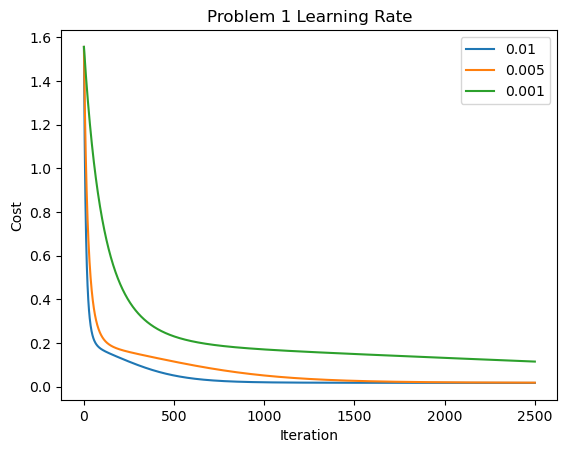

In [4]:
for i in range(3):
    plt.plot(cost_1[i])
plt.legend(lr_1)
plt.title("Problem 1 Learning Rate")
plt.xlabel("Iteration")
plt.ylabel("Cost")

### View Results

Final cost:  0.0001342960840208682
CPU times: user 25 s, sys: 60.7 ms, total: 25.1 s
Wall time: 25.1 s


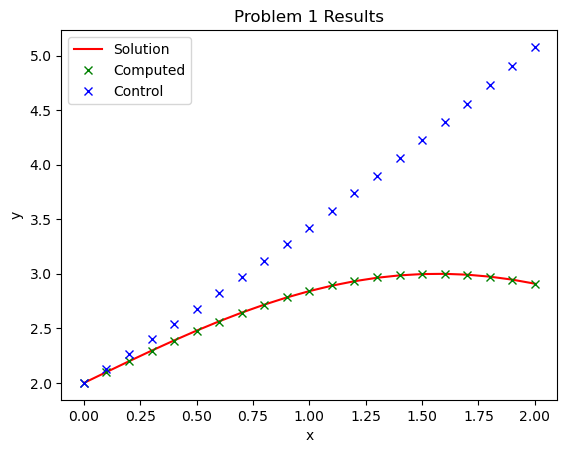

In [5]:
%%time
# measure training time
for n in range(70000):
    ode_trial_sol_1.update_weights(x_1, 0.01)
    
train_value_1 = ode_trial_sol_1.get_real_values(x_1)
control_value_1 = control_1.get_real_values(x_1)

plt.plot(x_1, solution_1(x_1), 'r-', x_1, train_value_1, 'gx', x_1, control_value_1, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 1 Results")
plt.xlabel("x")
plt.ylabel("y")

print("Final cost: ", ode_trial_sol_1.cost(x_1))

## Problem 2

$$
  \frac{dy}{dx} = \frac{cos(x)}{2y},~~ y(0) = 1
$$

We will solve for x in [0, 2].

### Initializing Values

In [6]:
def f_2(x, y):
    return np.cos(x)/(2*y)

def f_der_2(x, y):
    return -np.cos(x)/(2*y**2)

def f_der_null(x, y):
    return 0
    
def solution_2(x):
    return np.sqrt(np.sin(x) + 1) 

# to get solution
control_2 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_2, 1)
ode_trial_sol_2 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_2, 1)
ode_trial_sol_2_no_der = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_null, 1)

# for testing different learning rates
ode_solver_lr_2 = []
# with derivative vs no derivative
ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_2, 1))
ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_null, 1))

ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_2, 1))
ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_null, 1))

ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_2, 1))
ode_solver_lr_2.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_2, f_der_null, 1))

cost_2 = [] 

x_2 = np.arange(0.0, 2.01, 0.1)
x_2 = np.reshape(x_2, (-1, 1))

# start cost (make sure is the same)
for i in range(len(ode_solver_lr_2)):
    cost_2.append([ode_solver_lr_2[i].cost(x_2)])

# training nn
lr_2 = [0.01, 0.005, 0.001]
for n in range(1000):
    for i in range(0, 6, 2):
        ode_solver_lr_2[i].update_weights(x_2, lr_2[int(i/2)])
        ode_solver_lr_2[i+1].update_weights(x_2, lr_2[int(i/2)])
        cost_2[i].append(ode_solver_lr_2[i].cost(x_2))
        cost_2[i+1].append(ode_solver_lr_2[i+1].cost(x_2))

Text(0, 0.5, 'Cost')

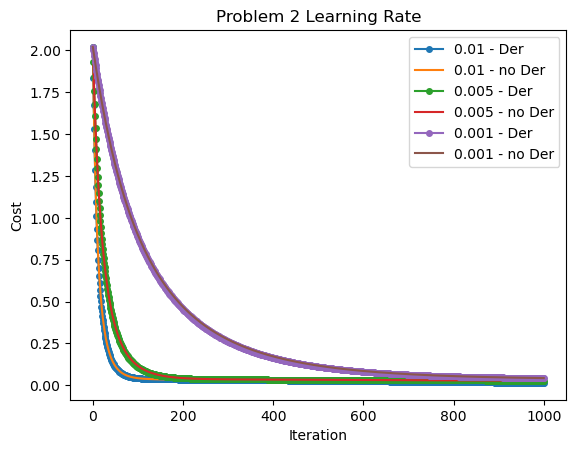

In [7]:
for i in range(0, 6, 2):
    plt.plot(cost_2[i], marker="o", markersize=4)
    plt.plot(cost_2[i+1])
    
plt.legend(["0.01 - Der", "0.01 - no Der", "0.005 - Der", "0.005 - no Der", "0.001 - Der", "0.001 - no Der"])
plt.title("Problem 2 Learning Rate")
plt.xlabel("Iteration")
plt.ylabel("Cost")

### View Results - derivative

Final cost:  5.6598326068123866e-05
CPU times: user 25.9 s, sys: 23.3 ms, total: 25.9 s
Wall time: 25.6 s


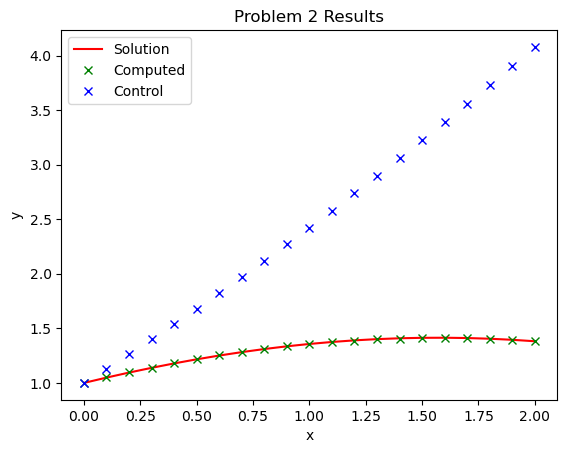

In [8]:
%%time
# measure training time
for n in range(70000):
    ode_trial_sol_2.update_weights(x_2, 0.01)
    
train_value_2 = ode_trial_sol_2.get_real_values(x_2)
control_value_2 = control_2.get_real_values(x_2)

plt.plot(x_2, solution_2(x_2), 'r-', x_2, train_value_2, 'gx', x_2, control_value_2, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 2 Results")
plt.xlabel("x")
plt.ylabel("y")

print("Final cost: ", ode_trial_sol_2.cost(x_2))

### View Results - no derivative

Final cost:  6.383043233861629e-05
CPU times: user 25.1 s, sys: 35.4 ms, total: 25.1 s
Wall time: 25 s


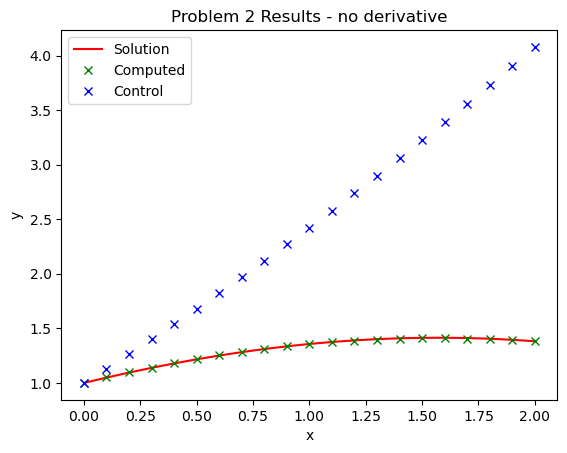

In [9]:
%%time
# measure training time
for n in range(70000):
    ode_trial_sol_2_no_der.update_weights(x_2, 0.01)
    
train_value_2_no_der = ode_trial_sol_2_no_der.get_real_values(x_2)


plt.plot(x_2, solution_2(x_2), 'r-', x_2, train_value_2_no_der, 'gx', x_2, control_value_2, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 2 Results - no derivative")
plt.xlabel("x")
plt.ylabel("y")

print("Final cost: ", ode_trial_sol_2_no_der.cost(x_2))

## Problem 3

$$
  \frac{dy}{dx} = y + x,~~ y(0) = 0
$$

We will solve for x in [0, 1].

In [10]:
def f_3(x, y):
    return y + x

def f_der_3(x, y):
    return 1
    
def solution_3(x):
    return -x -1 + np.exp(x)

# to get solution
control_3 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_3, f_der_3, 0)
ode_trial_sol_3 = FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_3, f_der_3, 0)

# for testing different learning rates
ode_solver_lr_3 = []
ode_solver_lr_3.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_3, f_der_3, 0))
ode_solver_lr_3.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_3, f_der_3, 0))
ode_solver_lr_3.append(FirstODE([0.2, 0.3, 0.3], [0.4, 0.5, 0.5], [0.6, 0.7, 0.8], f_3, f_der_3, 0))
cost_3 = [] 

x_3 = np.arange(0.0, 1.1, 0.1)
x_3 = np.reshape(x_3, (-1, 1))


# start cost (make sure is the same)
for i in range(3):
    cost_3.append([ode_solver_lr_3[i].cost(x_3)])

# training nn
lr_3 = [0.01, 0.005, 0.001]
for n in range(10000):
    for i in range(3):
        ode_solver_lr_3[i].update_weights(x_3, lr_3[i])
        cost_3[i].append(ode_solver_lr_3[i].cost(x_3))

Text(0, 0.5, 'Cost')

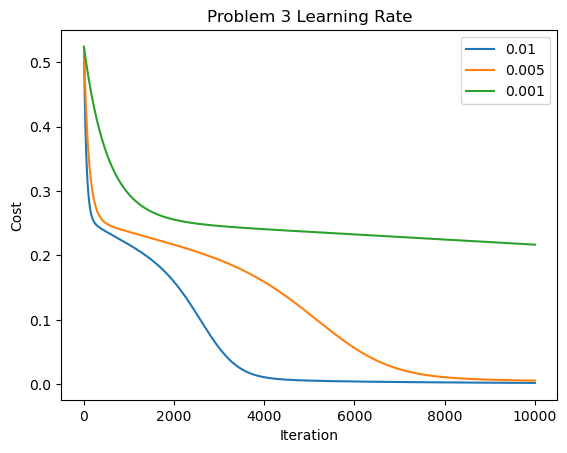

In [11]:
for i in range(3):
    plt.plot(cost_3[i])
plt.legend(lr_3)
plt.title("Problem 3 Learning Rate")
plt.xlabel("Iteration")
plt.ylabel("Cost")

### View Results

Final cost:  9.794195199908578e-05
CPU times: user 35.1 s, sys: 43.5 ms, total: 35.1 s
Wall time: 35 s


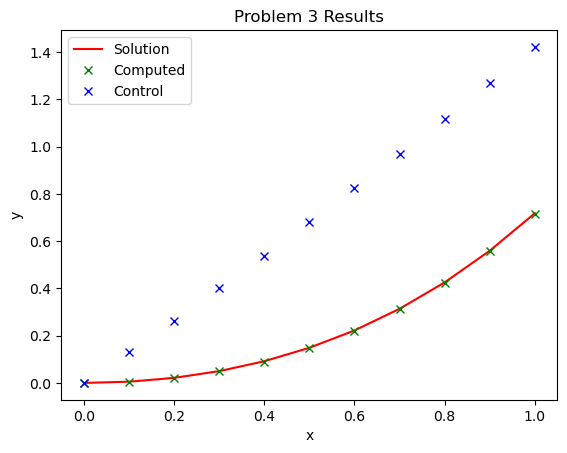

In [12]:
%%time
for n in range(100000):
    ode_trial_sol_3.update_weights(x_3, 0.01)


train_value_3 = ode_trial_sol_3.get_real_values(x_3)
control_value_3 = control_3.get_real_values(x_3)

plt.plot(x_3, solution_3(x_3), 'r-', x_3, train_value_3, 'gx', x_3, control_value_3, 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 3 Results")
plt.xlabel("x")
plt.ylabel("y")

print("Final cost: ", ode_trial_sol_3.cost(x_3))